# Task 1: First Derivative Using Newton’s Forward Difference Formula.

First derivative at x=0 using Newton's Forward Difference Formula: -1.0417


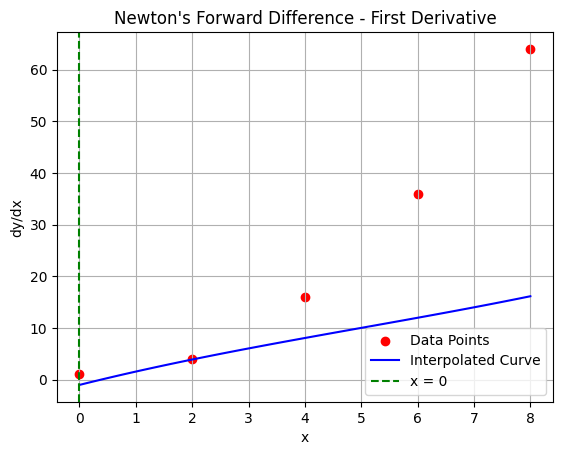

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0, 2, 4, 6, 8])
y = np.array([1, 4, 16, 36, 64])

# Function to calculate forward differences
def forward_difference(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]
    return diff_table

# First derivative using Newton's Forward Difference Formula
def first_derivative_forward(x_data, y_data, x_val):
    n = len(x_data)
    h = x_data[1] - x_data[0]
    u = (x_val - x_data[0]) / h
    diff_table = forward_difference(y_data)
    dy_dx = diff_table[0][1] / h
    dy_dx += ((2 * u - 1) * diff_table[0][2]) / (2 * h)
    dy_dx += ((3 * u**2 - 6 * u + 2) * diff_table[0][3]) / (6 * h)
    dy_dx += ((4 * u**3 - 18 * u**2 + 22 * u - 6) * diff_table[0][4]) / (24 * h)
    return dy_dx

# Estimate dy/dx at x=0
x_val = 0
dy_dx_at_0 = first_derivative_forward(x, y, x_val)
print(f"First derivative at x={x_val} using Newton's Forward Difference Formula: {dy_dx_at_0:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [first_derivative_forward(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.legend()
plt.title("Newton's Forward Difference - First Derivative")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid()
plt.show()

# Task 2: Second Derivative Using Newton’s Forward Difference Formula

Second derivative at x=0 using Newton's Forward Difference Formula: 2.7292


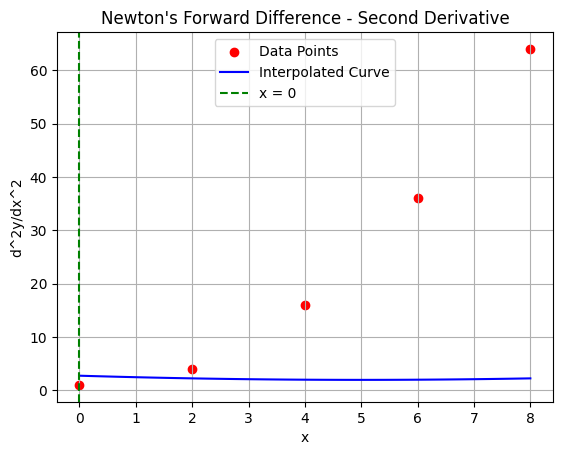

In [11]:
# Second derivative using Newton's Forward Difference Formula
def second_derivative_forward(x_data, y_data, x_val):
    n = len(x_data)
    h = x_data[1] - x_data[0]
    u = (x_val - x_data[0]) / h
    diff_table = forward_difference(y_data)
    d2y_dx2 = diff_table[0][2] / (h**2)
    d2y_dx2 += ((u - 1) * diff_table[0][3]) / (h**2)
    d2y_dx2 += ((6 * u**2 - 18 * u + 11) * diff_table[0][4]) / (12 * h**2)
    return d2y_dx2

# Estimate d^2y/dx^2 at x=0
x_val = 0
d2y_dx2_at_0 = second_derivative_forward(x, y, x_val)
print(f"Second derivative at x={x_val} using Newton's Forward Difference Formula: {d2y_dx2_at_0:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [second_derivative_forward(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.legend()
plt.title("Newton's Forward Difference - Second Derivative")
plt.xlabel("x")
plt.ylabel("d^2y/dx^2")
plt.grid()
plt.show()

# Task 3: First Derivative Using Newton’s Backward Difference Formula

First derivative at x=9 using Newton's Backward Difference Formula: 20.0000


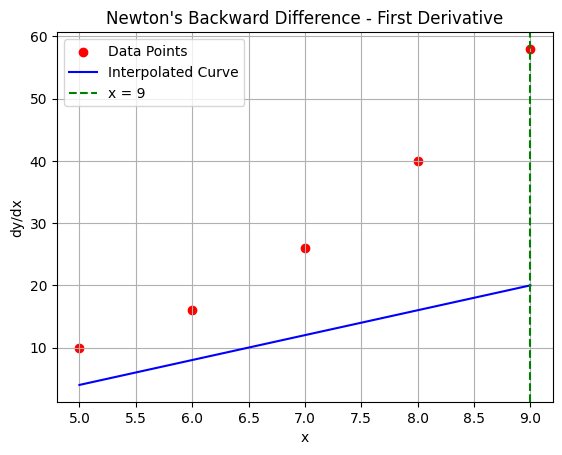

In [12]:
# Given data
x = np.array([5, 6, 7, 8, 9])
y = np.array([10, 16, 26, 40, 58])

# Function to calculate backward differences
def backward_difference(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i][j] = diff_table[i][j - 1] - diff_table[i - 1][j - 1]
    return diff_table

# First derivative using Newton's Backward Difference Formula
def first_derivative_backward(x_data, y_data, x_val):
    n = len(x_data)
    h = x_data[1] - x_data[0]
    u = (x_val - x_data[-1]) / h
    diff_table = backward_difference(y_data)
    dy_dx = diff_table[-1][1] / h
    dy_dx += ((2 * u + 1) * diff_table[-1][2]) / (2 * h)
    dy_dx += ((3 * u**2 + 6 * u + 2) * diff_table[-1][3]) / (6 * h)
    dy_dx += ((4 * u**3 + 18 * u**2 + 22 * u + 6) * diff_table[-1][4]) / (24 * h)
    return dy_dx

# Estimate dy/dx at x=9
x_val = 9
dy_dx_at_9 = first_derivative_backward(x, y, x_val)
print(f"First derivative at x={x_val} using Newton's Backward Difference Formula: {dy_dx_at_9:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [first_derivative_backward(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.legend()
plt.title("Newton's Backward Difference - First Derivative")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid()
plt.show()

# Task 4: Derivative Using Unequally Spaced Values

First derivative at x=3 using Lagrange's Interpolation Formula: -4.0000


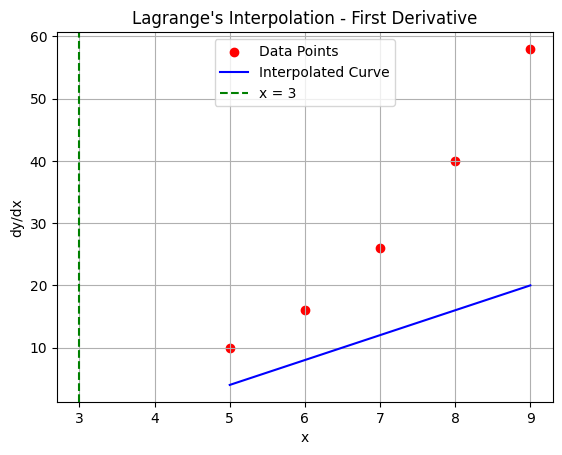

In [13]:
# Lagrange's Interpolation Formula for Derivatives
def lagrange_derivative(x_data, y_data, x_val):
    n = len(x_data)
    result = 0
    for i in range(n):
        term = 0
        for j in range(n):
            if i != j:
                product = 1
                for k in range(n):
                    if k != i and k != j:
                        product *= (x_val - x_data[k]) / (x_data[i] - x_data[k])
                term += product / (x_data[i] - x_data[j])
        result += y_data[i] * term
    return result

# Estimate dy/dx at x=3
x_val = 3
dy_dx_at_3 = lagrange_derivative(x, y, x_val)
print(f"First derivative at x={x_val} using Lagrange's Interpolation Formula: {dy_dx_at_3:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [lagrange_derivative(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.legend()
plt.title("Lagrange's Interpolation - First Derivative")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid()
plt.show()

# Task 5: Maxima or Minima of a Tabulated Function

Maximum occurs at x=6


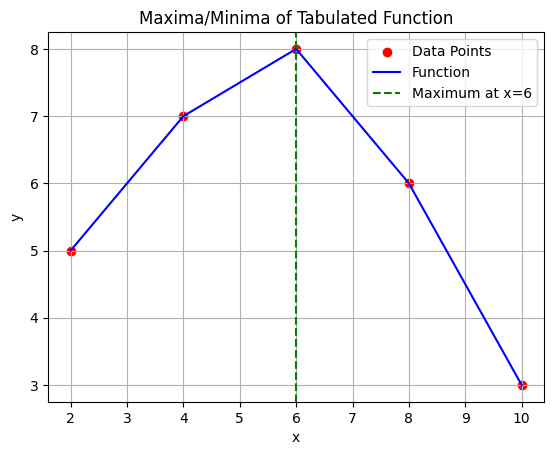

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([2, 4, 6, 8, 10])
y = np.array([5, 7, 8, 6, 3])

# Function to find extrema (maxima and minima)
def find_extrema(x_data, y_data):
    n = len(y_data)
    extrema_points = []
    for i in range(1, n - 1):  # Skip the first and last points
        if (y_data[i] > y_data[i - 1] and y_data[i] > y_data[i + 1]):
            extrema_points.append((x_data[i], "Maximum"))
        elif (y_data[i] < y_data[i - 1] and y_data[i] < y_data[i + 1]):
            extrema_points.append((x_data[i], "Minimum"))
    return extrema_points

# Find maxima or minima
extrema = find_extrema(x, y)

# Print the results in the desired format
for point, nature in extrema:
    print(f"{nature} occurs at x={point}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y, label='Function', color='blue')

# Add vertical lines for extrema
for point, nature in extrema:
    plt.axvline(x=point, color='green', linestyle='--', label=f'{nature} at x={point}')

# Add legend and labels
plt.legend()
plt.title("Maxima/Minima of Tabulated Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()